In [1]:
# 필요한 라이브러리 import 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data 읽어오기 , 경로복사 붙여넣기
data = '/content/drive/MyDrive/Data/result.txt'
df = pd.read_csv(data, sep=',' )
df.columns = ["y", 'x1', 'x2']
df

,y,x1,x2
0,0,380,3.61
1,1,660,3.67
2,1,800,4.00
3,1,640,3.19
4,0,520,2.93
...,...,...,...
395,1,620,4.00
396,1,560,3.04
397,0,460,2.63
398,1,700,3.65


In [4]:
df['y'].value_counts()

1    287
0    113
Name: y, dtype: int64

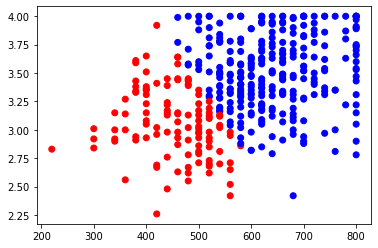

In [5]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue'}
ax.scatter(df['x1'], df['x2'], c=df['y'].map(colors))
plt.show()

In [6]:
n = 400
ts = 80
vs =80
print(n,ts,vs)

400 80 80


In [7]:
# 데이터 분리 (데이터 400개를 80개씩 분리함.)
train_df, test_df = train_test_split(df, test_size = ts, random_state = 123)
train_df, val_df = train_test_split(train_df, test_size = vs, random_state = 123)
print(len(train_df),len(test_df),len(val_df))

240 80 80


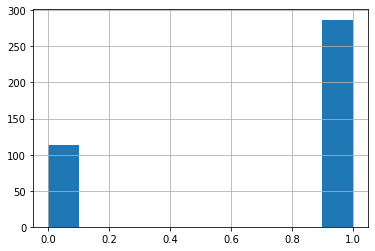

In [8]:
df['y'].hist()

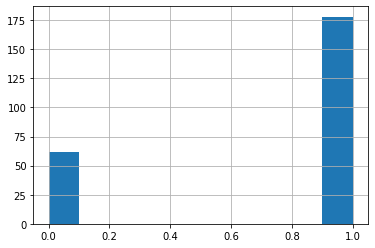

In [9]:
train_df['y'].hist()

In [10]:
train_df[:2]

,y,x1,x2
354,1,540,3.78
225,1,720,3.50


In [11]:
# 입력데이터로 정리  
y_train = train_df.pop('y')
x_train = train_df
y_test = test_df.pop('y')
x_test = test_df
y_val = val_df.pop('y')
x_val = val_df
x_train

,x1,x2
354,540,3.78
225,720,3.50
294,480,2.55
12,760,4.00
156,560,2.52
...,...,...
318,480,3.71
307,580,3.51
200,800,3.31
262,520,3.19


In [12]:
# input_shape, 입력변수의 개수 확인 
train_features = np.array(train_df)
train_features.shape[-1]

2

In [27]:
# 다층의 layer를 쌓아서 모델링, 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택 
model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=(train_features.shape[-1],)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid')) # sigmoid는 0에서 1의 값을 갖게 하는 것.
                                                       # 0.5보다 작으면 0, 0.5보다 크면 1이라 판단함.
model.compile(optimizer='adam',
              loss='binary_crossentropy', # loss로 0 또는 1 구분.
              metrics=['accuracy'])       # 측정은 accuracy로 함.

In [28]:
#모델 요약해서 보기
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 24        
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


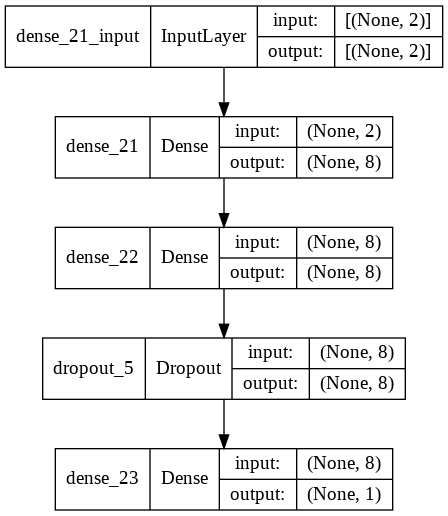

In [29]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [30]:
# 모델 저장 설정
save_weights = tf.keras.callbacks.ModelCheckpoint("model.hdf5",
                                                  monitor='val_accuracy',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode="max",
                                                  save_freq="epoch",
                                                  save_weights_only=True)

In [41]:
# 모델 학습 및 필요 데이터 저장 
history = model.fit(x_train, y_train, validation_data=(x_val, y_val) ,
                    epochs=20,   # 전체 프로세스를 몇번 반복할것인지.
                    batch_size=100, # 한 epochs를 돌때, 우리가 데이터를 몇개씩 하나의 batch로 입력시킬것인지.
                    callbacks=[save_weights])

Epoch 1/20
1/3 [=========>....................] - ETA: 0s - loss: 0.6067 - accuracy: 0.6100
Epoch 00001: val_accuracy did not improve from 0.73750
3/3 [==============================] - 0s 35ms/step - loss: 0.5904 - accuracy: 0.6458 - val_loss: 0.5230 - val_accuracy: 0.6875
Epoch 2/20
1/3 [=========>....................] - ETA: 0s - loss: 0.5125 - accuracy: 0.7000
Epoch 00002: val_accuracy did not improve from 0.73750
3/3 [==============================] - 0s 16ms/step - loss: 0.5329 - accuracy: 0.6958 - val_loss: 0.5196 - val_accuracy: 0.6875
Epoch 3/20
1/3 [=========>....................] - ETA: 0s - loss: 0.5652 - accuracy: 0.6300
Epoch 00003: val_accuracy did not improve from 0.73750
3/3 [==============================] - 0s 15ms/step - loss: 0.5358 - accuracy: 0.6542 - val_loss: 0.5177 - val_accuracy: 0.6875
Epoch 4/20
1/3 [=========>....................] - ETA: 0s - loss: 0.5665 - accuracy: 0.6100
Epoch 00004: val_accuracy did not improve from 0.73750
3/3 [=======================

In [42]:
# 훈련된 이미지 분류기는 이 데이터셋에서 거의 99.9%의 정확도를 달성
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

3/3 - 0s - loss: 0.5207 - accuracy: 0.6875 - 19ms/epoch - 6ms/step
Loss:  0.5206729769706726
Accuracy:  0.6875


In [43]:
# 학습간 저장된 데이터 확인  
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

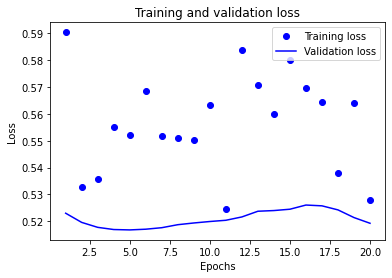

In [44]:
# 손실과 정확도 도식 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

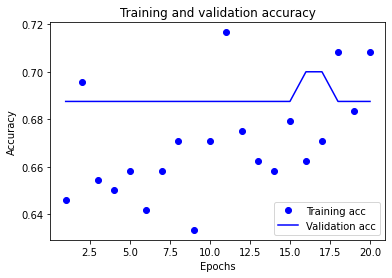

In [45]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [52]:
new_x = [[101,3.6],[340,3.2],[580,4.3]]

In [53]:
# 저장된 모델 호출 
model.load_weights('model.hdf5')

y_pred = model.predict(new_x)
print(np.round(y_pred).astype(int))

[[0]
 [0]
 [1]]


In [ ]:
#모델 평가결과 정확도 향상을 위해 추가적으로 노력해야할 사항은 어떤 것이 있는지 기술하세요.
 모델 평가결과의 정확도가 낮다면 향상을 위해서는 데이터의 양을 기존의 양보다 늘릴 필요가 있습니다. 또한 전체 프로세스를 몇번 반복할것인지에 대한 epochs의 값과  
 한 epochs를 돌때, 우리가 데이터를 몇개씩 하나의 batch로 입력시킬것인지에 대해 batch_size의 값을 바꿔주면서 모델을 학습시켜주면 정확도가 전보다 향상될 것입니다. 또한, 
 데이터의 각 가중치를 조절한다면 모델의 정확도를 향상시킬 수 있다고 생각합니다.
 위의 모델에서는 데이터의 양이 적어 epochs의 값과 batch_size의 값을 작게 설정해 주었습니다. 이렇듯, 데이터의 양이나 모델의 수를 늘려주고 epochs값과 batch_size의 값을 
 조정해주면 정확도를 향상시키는 데 도움이 될 것입니다.